In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import data_catalog
import tseries_mod
import esmlab_wrap

In [2]:
data_catalog.set_catalog('experiments')

active catalog: experiments


In [3]:
varnames = ['SFCO2_LND', 'SFCO2_OCN', 'SFCO2_FFF', 'CO2', 'TMCO2']

In [4]:
experiment = 'esm-hist-cmip5'
esm_hist_cmip5_ann = tseries_mod.tseries_get_vars(varnames, 'atm', experiment, stream='cam2.h0', freq='ann')
# print(esm_hist_cmip5_ann)

In [5]:
experiment = 'esm-hist'
esm_hist_ann = tseries_mod.tseries_get_vars(varnames, 'atm', experiment, freq='ann')
# print(esm_hist_ann)

In [6]:
# add cummulate flux vars to datasets
for ds in [esm_hist_cmip5_ann, esm_hist_ann]:
    for varname in ['SFCO2_LND', 'SFCO2_OCN', 'SFCO2_FFF']:
        da = ds[varname].cumsum(dim='time', keep_attrs=True)
        da.name = varname+'_CUM'
        da.attrs['units'] = 'Pg'
        ds[da.name] = da

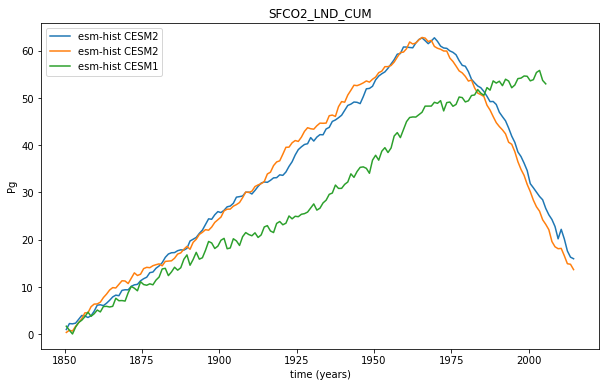

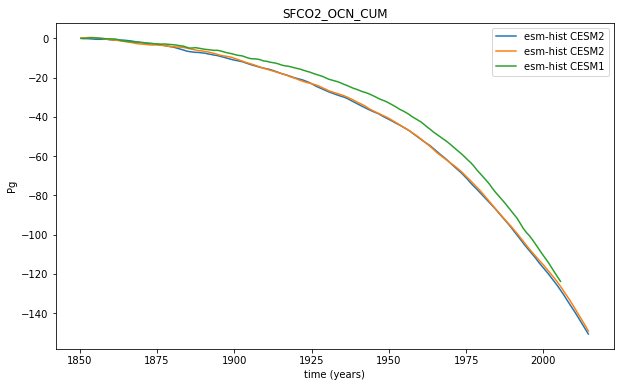

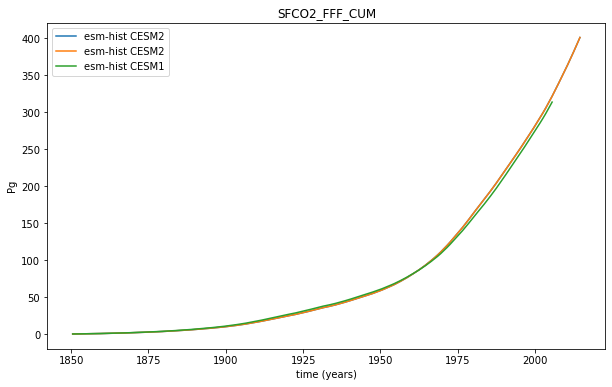

In [7]:
ds_list = [esm_hist_ann, esm_hist_cmip5_ann]
legend_list = ['esm-hist CESM2', 'esm-hist CESM1']
varname = 'SFCO2_LND_CUM'
tseries_mod.tseries_plot_1var(varname, ds_list, legend_list, varname, region_val='Global')
varname = 'SFCO2_OCN_CUM'
tseries_mod.tseries_plot_1var(varname, ds_list, legend_list, varname, region_val='Global')
varname = 'SFCO2_FFF_CUM'
tseries_mod.tseries_plot_1var(varname, ds_list, legend_list, varname, region_val='Global')

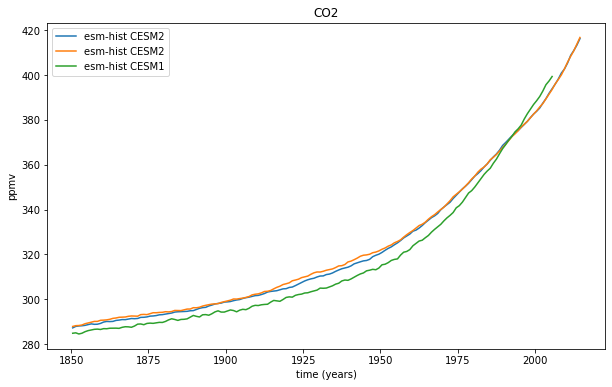

In [8]:
ds_list = [esm_hist_ann, esm_hist_cmip5_ann]
legend_list = ['esm-hist CESM2', 'esm-hist CESM1']
varname = 'CO2'
tseries_mod.tseries_plot_1var(varname, ds_list, legend_list, varname, region_val='Global', vdim_name='lev')